In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("Feb_TDR.csv")
print(data.describe().transpose())
print(data.info())

             count        mean        std  min  25%   50%   75%     max
LeadsNumber  229.0  191.441048  894.83724  1.0  4.0  15.0  67.0  9923.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 5 columns):
Publisher      229 non-null object
Country        229 non-null object
Area           229 non-null object
US/INTL        229 non-null object
LeadsNumber    229 non-null int64
dtypes: int64(1), object(4)
memory usage: 5.4+ KB
None


In [3]:
data.head()

,Publisher,Country,Area,US/INTL,LeadsNumber
0,Qualifa,Luxembourg,EMEA,INTL,2
1,Qualifa,Netherlands,EMEA,INTL,6
2,Qualifa,Norway,EMEA,INTL,1
3,Qualifa,United States,USCA,US,1201
4,ITBriefcase,United Kingdom,EMEA,INTL,20


In [84]:
data.pivot_table(columns="Country", values='LeadsNumber', aggfunc=np.sum).stack()

             Country                       
LeadsNumber  Australia                          2178
             Austria                               7
             Bahrain                               1
             Belgium                              32
             Brazil                               79
             Bulgaria                              3
             Canada                              417
             ChiUSCA                               1
             Chile                                 1
             Croatia                               4
             Cyprus                                2
             Czech Republic                       31
             Denmark                              42
             Finland                              15
             France                              401
             Germany                             854
             Greece                                2
             Hong Kong                           201
  

Text(0.5, 1.0, 'How many Countries per publisher deliver to in Feb?')

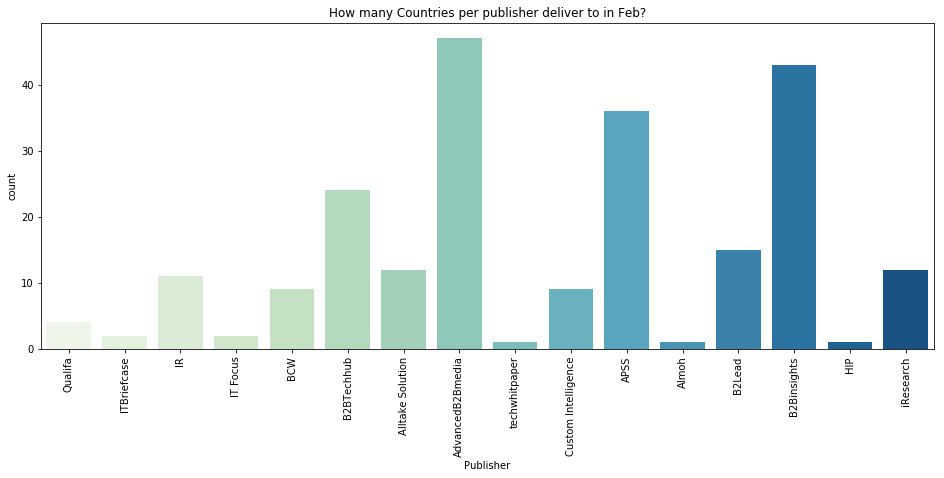

In [4]:
plt.figure(figsize = (16,6))
sns.countplot(x = data['Publisher'], palette='GnBu')
plt.xticks(rotation = 90);
plt.title('How many Countries per publisher deliver to in Feb?')


#### Advanced B2B Media, B2Binsights and APSS delivered to more than 30 countries. 

In [5]:
data.pivot_table(columns='Publisher', values='LeadsNumber', aggfunc=np.sum)

Publisher,APSS,AdvancedB2Bmedia,Alltake Solution,Almoh,B2BTechhub,B2Binsights,B2Lead,BCW,Custom Intelligence,HIP,IR,IT Focus,ITBriefcase,Qualifa,iResearch,techwhitpaper
LeadsNumber,3091,2090,167,115,5560,15161,636,1675,622,615,7536,271,24,1210,1619,3448


In [6]:
LTD = data['LeadsNumber'].sum()
print("Total leads number delivered in Feb are:", LTD)

Total leads number delivered in Feb are: 43840


In [7]:
groupedbyP=data.groupby('Publisher')
LeadsbyP = groupedbyP['LeadsNumber'].agg(np.sum)

Text(0.5, 1.0, 'How many Leads delivered per publisher in Feb?')

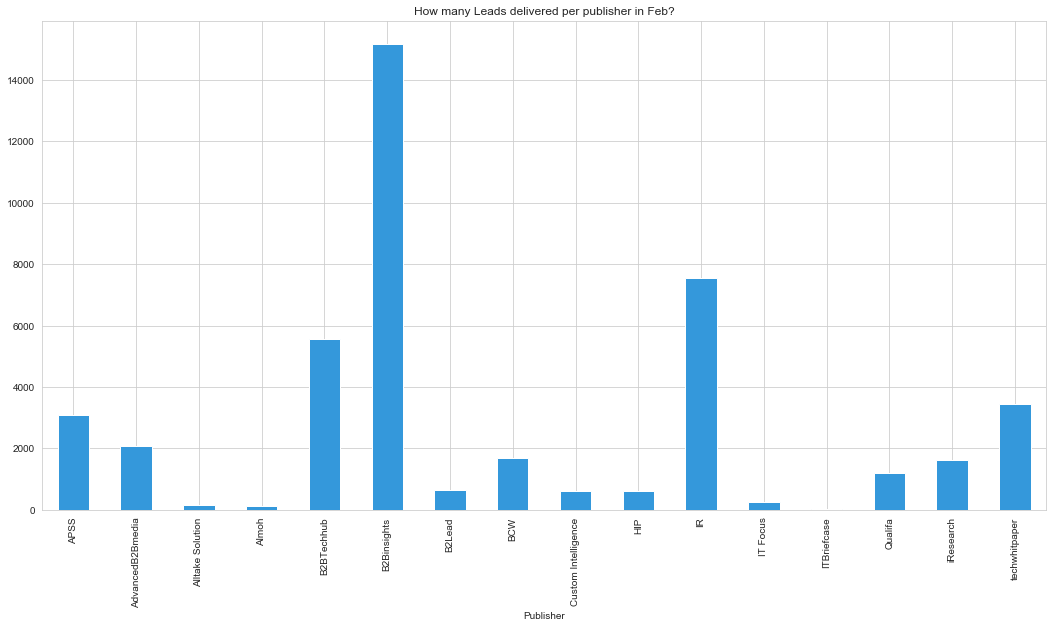

In [8]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,9))
LeadsbyP.plot(kind='bar',color='#3498DB')
plt.title('How many Leads delivered per publisher in Feb?')

#### B2Binsights contributed to the most leads, which is 35%

In [10]:
data.pivot_table(columns='Area', values='LeadsNumber', aggfunc=np.sum)

Area,APAC,EMEA,SA,USCA
LeadsNumber,4761,7591,91,31397


<Figure size 1152x648 with 0 Axes>

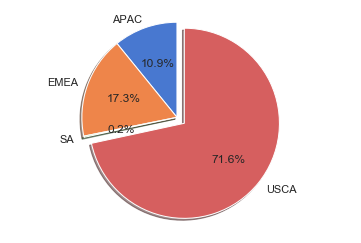

In [56]:
plt.figure(figsize = (16,9))
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'APAC', 'EMEA', 'SA', 'USCA'
sizes = [4761, 7591, 91, 31397]
explode = (0, 0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Our leads are mostly from USCA, which contributed 71.6%. EMEA followed by as 17.3%, then APAC as 10.9%. South America contributed least as 0.2%. In this case, Mexico and Brazil consist of South America.

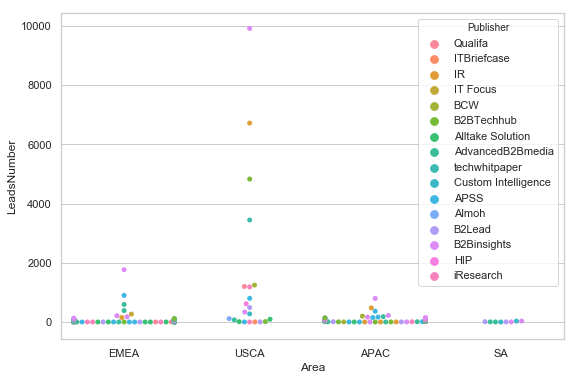

In [57]:
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize = (9,6))
sns.swarmplot(x="Area", y="LeadsNumber", hue="Publisher",data=data);

In [12]:
USCA = data[data['Area'] == 'USCA']
USCA

,Publisher,Country,Area,US/INTL,LeadsNumber
3,Qualifa,United States,USCA,US,1201
5,ITBriefcase,United States,USCA,US,4
16,IR,United States,USCA,US,6723
27,BCW,United States,USCA,US,1248
29,B2BTechhub,Canada,USCA,US,15
51,B2BTechhub,United States,USCA,US,4832
52,Alltake Solution,Canada,USCA,US,12
63,Alltake Solution,United States,USCA,US,93
110,AdvancedB2Bmedia,United States,USCA,US,74
111,techwhitpaper,United States,USCA,US,3448


In [15]:
TLNU = USCA['LeadsNumber'].sum()
TLNU

31397

c:\users\exu\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


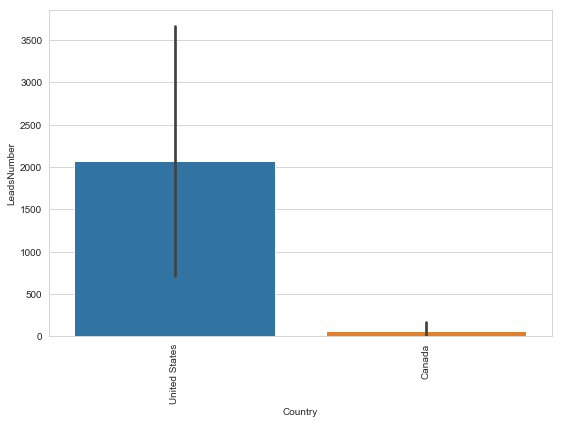

In [26]:
plt.figure(figsize = (9,6))
plt.xticks(rotation = 90);
sns.barplot(x="Country", y='LeadsNumber', data = USCA)

#### USCA is most made up of United States, while Canada only contributes for 1.18% leads.

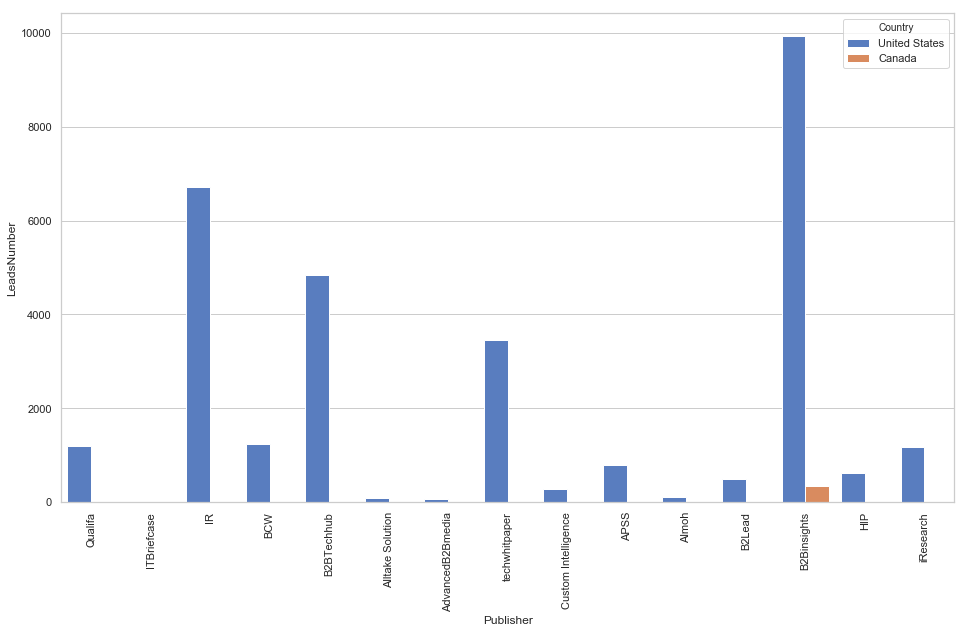

In [43]:
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize = (16,9))
sns.barplot(x="Publisher", y="LeadsNumber", hue="Country",data=USCA);
plt.xticks(rotation = 90);

#### All Publishers have leads delivered in US except IT focus.

In [50]:
APAC = data[data['Area'] == 'APAC']
APAC.head()

,Publisher,Country,Area,US/INTL,LeadsNumber
6,IR,Australia,APAC,INTL,477
7,IR,Hong Kong,APAC,INTL,18
8,IR,Indonesia,APAC,INTL,18
10,IR,Malaysia,APAC,INTL,3
11,IR,New Zealand,APAC,INTL,82


In [44]:
APAC.pivot_table(columns='Publisher', values='LeadsNumber', aggfunc=np.sum)

Publisher,APSS,AdvancedB2Bmedia,Alltake Solution,B2BTechhub,B2Binsights,B2Lead,BCW,Custom Intelligence,IR,iResearch
LeadsNumber,951,329,45,243,1774,11,220,117,646,425


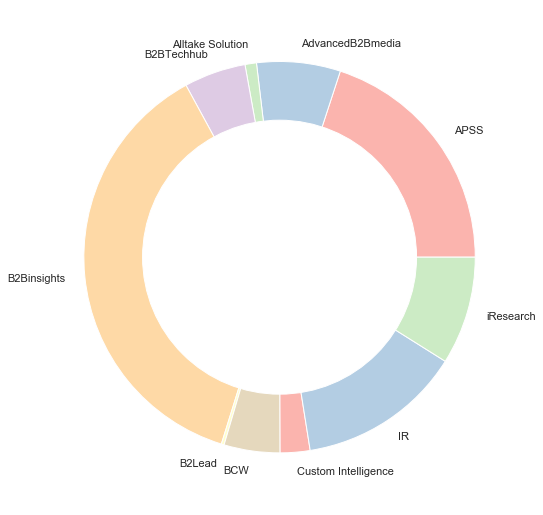

In [52]:
plt.figure(figsize = (16,9))
names = "APSS", "AdvancedB2Bmedia", "Alltake Solution", "B2BTechhub", "B2Binsights", "B2Lead", "BCW", "Custom Intelligence", "IR", "iResearch"
size = [951, 329, 45, 243, 1774, 11, 220, 117, 646, 425]
my_circle=plt.Circle( (0,0), 0.7, color='white')

from palettable.colorbrewer.qualitative import Pastel1_7
plt.pie(size, labels=names, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()



#### We can have a clear understanding B2Binsights contributed most to APAC leads delivery, followed by APSS and IR.

In [54]:
EMEA = data[data['Area'] == 'EMEA']
EMEA.head()
EMEA.pivot_table(columns='Publisher', values='LeadsNumber', aggfunc=np.sum)

Publisher,APSS,AdvancedB2Bmedia,Alltake Solution,B2BTechhub,B2Binsights,B2Lead,BCW,Custom Intelligence,IR,IT Focus,ITBriefcase,Qualifa,iResearch
LeadsNumber,1337,1680,17,470,3089,119,207,198,167,271,20,9,7


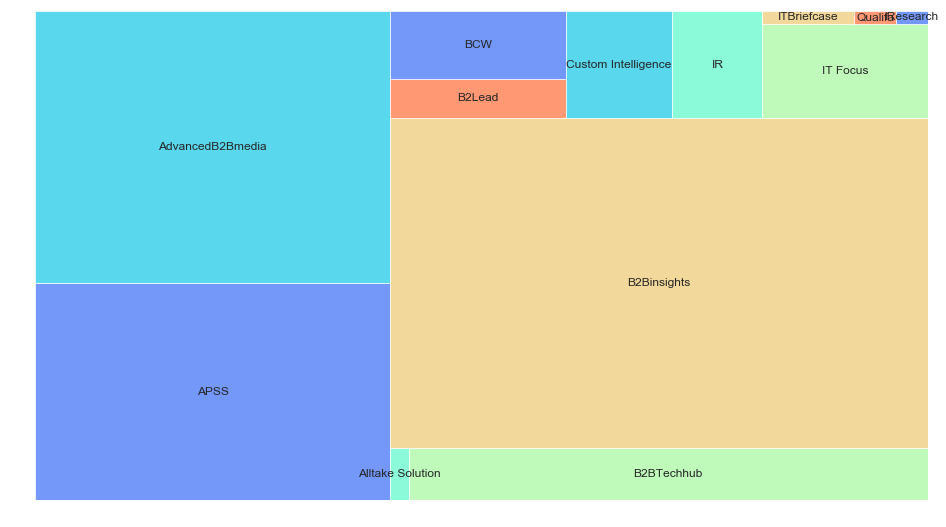

In [73]:
plt.figure(figsize = (16,9))
squarify.plot(sizes=[1337,1680,17,470,3089,119,207,198,167,271,20,9,7], color=sns.color_palette('rainbow'), label=["APSS", "AdvancedB2Bmedia", "Alltake Solution", "B2BTechhub", "B2Binsights", "B2Lead", "BCW", "Custom Intelligence", "IR", "IT Focus", "ITBriefcase", "Qualifa", "iResearch"], alpha=.7)
plt.axis('off')
plt.show()

#### B2Binsights, Advanced B2Bmedia and APSS contributes most to Feb leads at EMEA.

In [75]:
SA = data[data['Area'] == 'SA']
SA

,Publisher,Country,Area,US/INTL,LeadsNumber
67,AdvancedB2Bmedia,Brazil,SA,INTL,5
89,AdvancedB2Bmedia,Mexico,SA,INTL,2
113,Custom Intelligence,Brazil,SA,INTL,31
114,Custom Intelligence,Chile,SA,INTL,1
160,B2Lead,Brazil,SA,INTL,11
166,B2Lead,Mexico,SA,INTL,3
175,B2Binsights,Brazil,SA,INTL,32
196,B2Binsights,Mexico,SA,INTL,6


In [76]:
SA.pivot_table(columns='Publisher', values='LeadsNumber', aggfunc=np.sum)

Publisher,AdvancedB2Bmedia,B2Binsights,B2Lead,Custom Intelligence
LeadsNumber,7,38,14,32


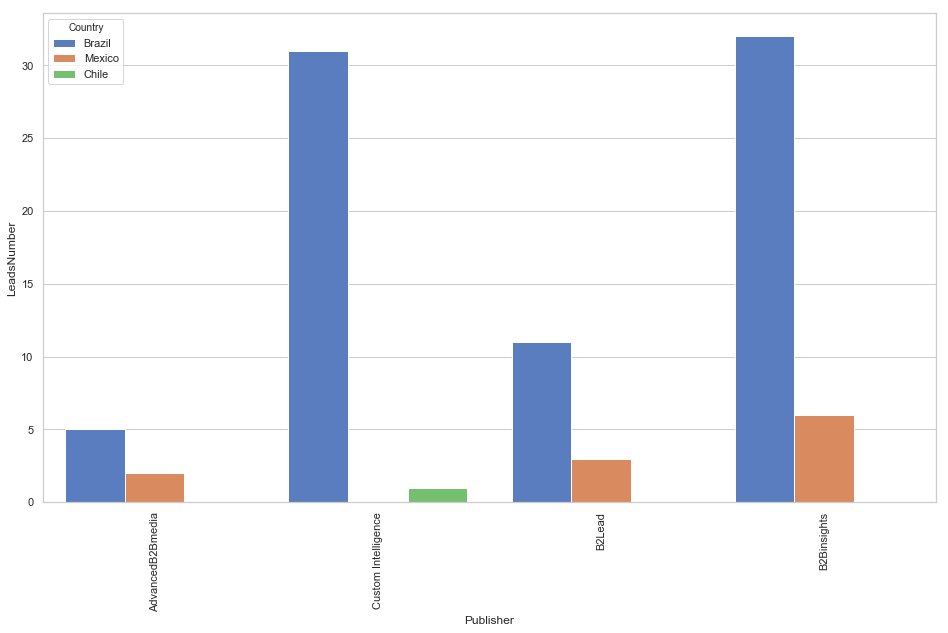

In [82]:
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize = (16,9))
sns.barplot(x="Publisher", y="LeadsNumber", hue="Country",data=SA);
plt.xticks(rotation = 90);

#### We have four publishers generates no more than 100 leads for South America and most of them went to Brazil.